In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset into python environment**

In [2]:
# load and dispaly the data set
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Make ‘PassengerId’ as the index column**

In [3]:
# Set 'PassengerId' as the index
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**

In [4]:
# understand the shape of data
df.shape

(891, 11)

In [5]:
# check the informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# describe the data set
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# check the null values
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


**4. Fill in all the missing values present in all the columns in the dataset**

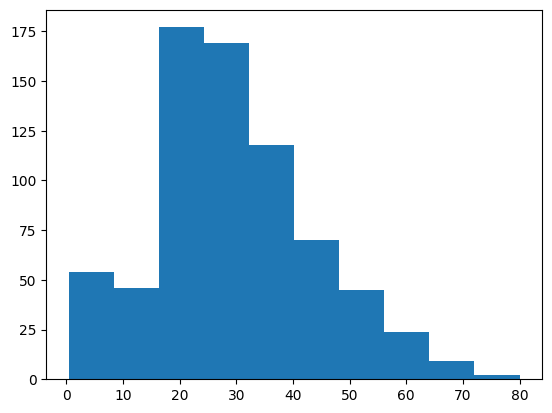

In [8]:
# plot histogram for age to understand the distribution
plt.hist(df['Age'])
plt.show()

In [9]:
# Handling missing values
# Age fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Cabin filled with "Unknown" instead of mean, median and mode
df['Cabin'].fillna('Unknown', inplace=True)
# Embarked filled with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Again check null values
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


**5. Check and handle outliers in at least 3 columns in the dataset**

<Axes: >

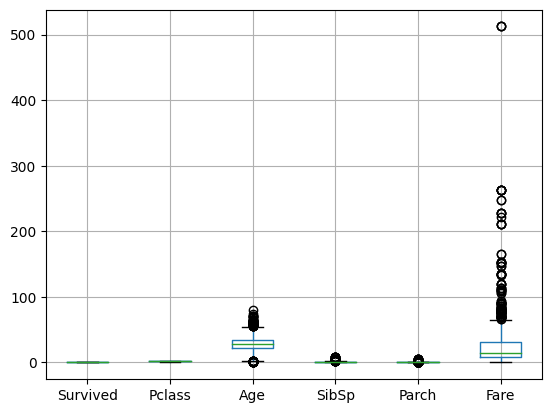

In [10]:
# plot boxplot to visualize the outliers
df.boxplot()

<Axes: >

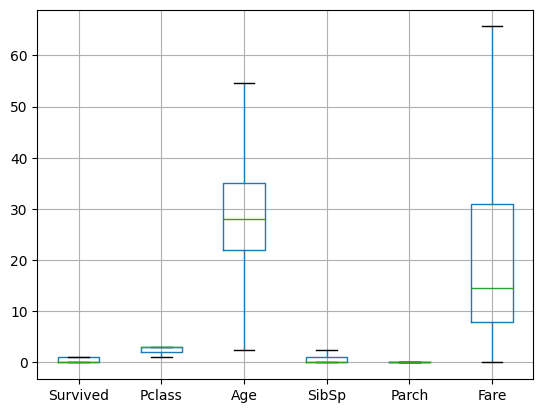

In [11]:
# Handling outliers in the data set using function
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df
df = handle_outliers(df, 'Age')
df = handle_outliers(df, 'Fare')
df = handle_outliers(df, 'SibSp')
df = handle_outliers(df, 'Parch')
df.boxplot()

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [12]:
# import minmax scaler
from sklearn.preprocessing import MinMaxScaler
# Separate features and target
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']
# Apply Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
# concat X & y
df_scaled = pd.concat([X_scaled_df, y], axis=1)
df_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,
1,1.0,0.375000,0.4,0.0,0.110460,0
2,0.0,0.682692,0.4,0.0,1.000000,1
3,1.0,0.451923,0.0,0.0,0.120745,1
4,0.0,0.625000,0.4,0.0,0.809027,1
5,1.0,0.625000,0.0,0.0,0.122649,0
